In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from robot_tools import *
import math
import cv2
import matplotlib.image as mpimg

In [2]:
def image_projection(w, h, nx, ny, f, coord_universe, T0C, Display = False):
    
    '''
    w: width of retina in m
    h: height of retina in m
    nx: horizontal pixels number
    ny: vertical pixels number
    f: focal length in m
    coord_universe: list -> Coordinate of the object / point in the universe frame
    TOC: Sympy Matrix -> Position of camera relative to the universe
    
    '''
    
    [xp, yp, zp] = coord_universe 
    
    # Size of te individual pixel
    Dw = symbols('dw')
    Dh = symbols('dh')

    # Principal point (centre of the renita)
    U0 = symbols('u0')
    V0 = symbols('v0')

    # Focal length in m
    F = symbols('f')

    # Coordinate of the object / point in the universe frame
    Xp = symbols('x_p')
    Yp = symbols('y_p')
    Zp = symbols('z_p')
    
    # Coordinate of the object homogeneous form
    P0 = Matrix([Xp, Yp, Zp, 1])

    # Camera parameters
    CM = Matrix([[F/Dw, 0, U0, 0],
                 [0, F/Dh, V0, 0],
                 [0, 0, 1, 0]])

    RES = CM * T0C**-1 * P0
    
    # Retina coordinate homogeneous form
    homo_retina = RES.subs({U0: nx/2, V0: ny/2, 
                    F: f, 
                    Dw: w/nx, Dh: h/ny, 
                    Xp: xp, Yp: yp, Zp: zp})
    
    # Retina coordinate
    retina = Matrix([round(homo_retina[0]/homo_retina[-1], 1), 
                     round(homo_retina[1]/homo_retina[-1], 1)])
    
    if Display:
        print('Camera parameters matrix')
        display(CM.subs({F: f, Dw: w/nx, Dh: h/ny, U0: nx/2, V0: ny/2}))
        
        print('Position of camera to the universe')
        display(T0C)
        
        print('Position of the object in the universe')
        display(P0.subs({Xp: xp, Yp: yp, Zp: zp}))
        
        print('Retina coordinates homogeneous')
        display(homo_retina)
        
        print('Retina coordinates')
        display(retina)
        
    # Retina coordinate
    u, v = int(retina[0]), int(retina[1])
    return [u, v]


def rgb2gray(img):
    # Compute the grayscale values using the luminosity method
    gray_vals = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

    # Convert the grayscale values to integers between 0 and 255
    imgBw = gray_vals.astype(np.uint8)
    return imgBw


def plot_hist_from_img(img, title = ''):
    
    # Flatten the image to a 1D array
    img_flat = img.flatten()
    # Define the bins for the histogram
    bins = np.arange(0, 256)
    # Compute the histogram using NumPy's histogram function
    hist, _ = np.histogram(img_flat, bins=bins)
    # Plot the histogram
    plt.bar(bins[:-1], hist, width=1)
    
    if title != '':
        plt.title(title)
    # Show the plot
    plt.show()
    
    return hist
    

[552, 552, 648, 648, 560, 560, 639, 639]
[566, 433, 433, 566, 554, 445, 445, 554]
 
[373, 373, 826, 826, 414, 414, 785, 785]
[814, 185, 185, 814, 757, 242, 242, 757]
 


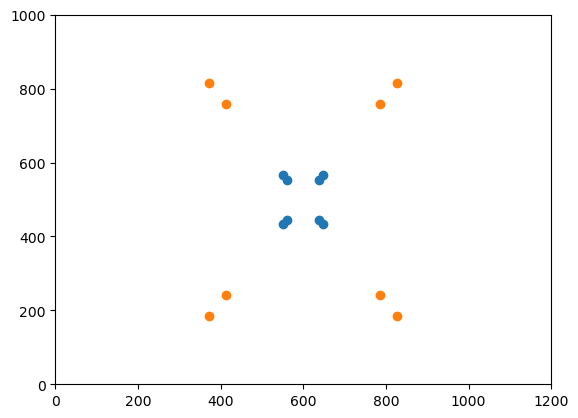

In [3]:
# Tut 7.6.1

# Define the cube vertices
cube_vertices = [[-1, 1, -1], [-1, -1, -1], [1, -1, -1], [1, 1, -1],
                [-1, 1, 1], [-1, -1, 1], [1, -1, 1], [1, 1, 1]]

# Coodinate of the camera relative to the cube
X, Y, Z = 0, 0, -10

# Position of camera relative to the universe
T0C = Matrix([[1, 0, 0, X],
              [0, 1, 0, Y], 
              [0, 0, 1, Z],
              [0, 0, 0, 1]])

# For two focal lengths
for f in [0.018, 0.085]:
    
    # create two lists, pixel location
    u_lst = []
    v_lst = []
    
    # For each vertice
    for i in cube_vertices:
        
        # Compute pixel location
        u, v = image_projection(w = 0.05, h = 0.03, 
                         nx = 1200, ny = 1000, 
                         f = f, 
                         coord_universe = i,
                         T0C = T0C)
        u_lst.append(u)
        v_lst.append(v)

    print(u_lst)
    print(v_lst)
    print(' ')
    plt.scatter(u_lst, v_lst)
    plt.xlim(0, 1200)
    plt.ylim(0, 1000)
#     plt.show()

[600, 600, 696, 696, 600, 600, 678, 678]
[633, 500, 500, 633, 609, 500, 500, 609]
 
[600, 600, 1053, 1053, 600, 600, 970, 970]
[1129, 500, 500, 1129, 1015, 500, 500, 1015]
 


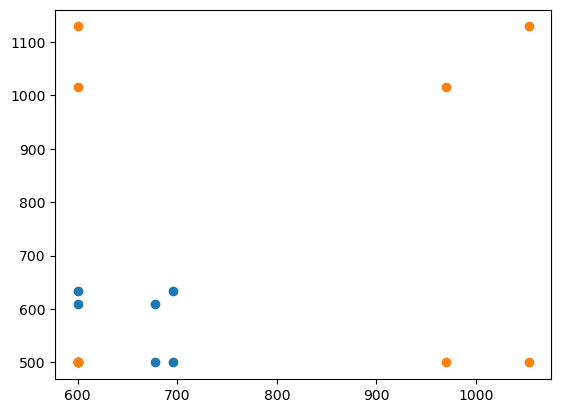

In [4]:
# Tut 7.6.2 

# Define the cube vertices
cube_vertices = [[-1, 1, -1], [-1, -1, -1], [1, -1, -1], [1, 1, -1],
                [-1, 1, 1], [-1, -1, 1], [1, -1, 1], [1, 1, 1]]

# Coodinate of the camera relative to the cube
X, Y, Z = -1, -1, -10

# Position of camera relative to the universe
T0C = Matrix([[1, 0, 0, X],
              [0, 1, 0, Y], 
              [0, 0, 1, Z],
              [0, 0, 0, 1]])

# For two focal lengths
for f in [0.018, 0.085]:
    
    # create two lists, pixel location
    u_lst = []
    v_lst = []
    
    # For each vertice    
    for i in cube_vertices:
        
        # Compute pixel location
        u, v = image_projection(w = 0.05, h = 0.03, 
                         nx = 1200, ny = 1000, 
                         f = f, 
                         coord_universe = i, 
                         T0C = T0C)
        u_lst.append(u)
        v_lst.append(v)

    print(u_lst)
    print(v_lst)
    print(' ')
    plt.scatter(u_lst, v_lst)
#     plt.xlim(0, 1200)
#     plt.ylim(0, 1000)

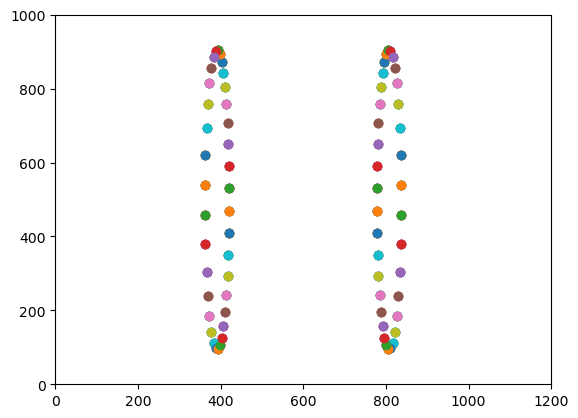

In [5]:
# Tut 7.6.3

# Define the cube vertices
cube_vertices = [[-1, 1, -1], [-1, -1, -1], [1, -1, -1], [1, 1, -1],
                [-1, 1, 1], [-1, -1, 1], [1, -1, 1], [1, 1, 1]]

# For each angle from 0 to 360 at a step of 10 degree
for angle in range(0, 360 + 10, 10):
    
    # create two lists, pixel location
    u_lst = []
    v_lst = []
    
    # Change angle to radians
    angle = np.radians(angle)
    
    # Rotational matrix, rotating around x axis
    Rot = Matrix(Rotation_non_pincipal_axes(angle = angle, 
                                            direction = [1, 0, 0], 
                                            rad = True))
    # Distance from camera to the cube
    d = 10
    x, y, z = 0, d*np.sin(angle), -d*cos(angle)

    # Insert a column, the coordinate of camera to the cube
    T0C = Rot.col_insert(3, Matrix([x, y, z]))
    T0C = T0C.row_insert(3, Matrix([0, 0, 0, 1]).T)
    
    for i in cube_vertices:
        u, v = image_projection(w = 0.05, h = 0.03, 
                             nx = 1200, ny = 1000, 
                             f = 0.085, 
                             coord_universe = i,
                             T0C = T0C)
        u_lst.append(u)
        v_lst.append(v)

    plt.scatter(u_lst, v_lst)
    plt.xlim(0, 1200)
    plt.ylim(0, 1000)

    

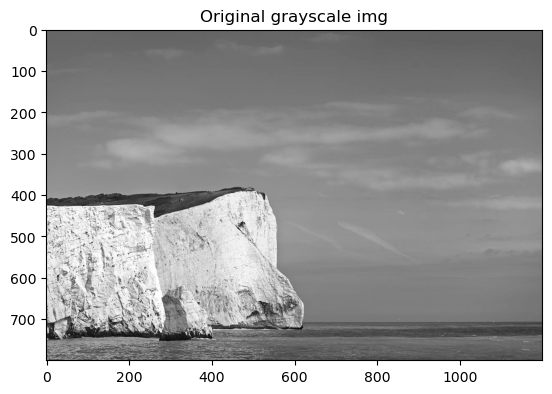

{0, 1}


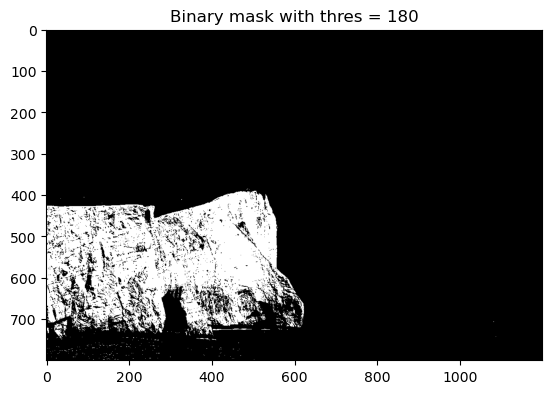

The percentage of pixels above the threshold is 13.8%


In [6]:
# Tut 7.6.4 a

# Method 1 of reading images (opencv)
img = cv2.imread('Computer_vision_files/Dover.jpeg')
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Method 2 of reading images (matplotlib)
# img = mpimg.imread('Computer_vision_files/Dover.jpeg')
# imgBw = rgb2gray(img)

plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title('Original grayscale img')
plt.show()

# Apply the threshold
thres = (imgBw > 180).astype('int')

# Thres is a musk with only 0 (<180) and 1 (>180)
print(set(thres.flatten()))
plt.imshow(thres, cmap=plt.cm.gray)
plt.title('Binary mask with thres = 180')
plt.show()

# Percentage of pixels above the threshold
percent = np.sum(thres)/(np.shape(thres)[0]*np.shape(thres)[1])
print(f'The percentage of pixels above the threshold is {round(percent*100,2)}%')

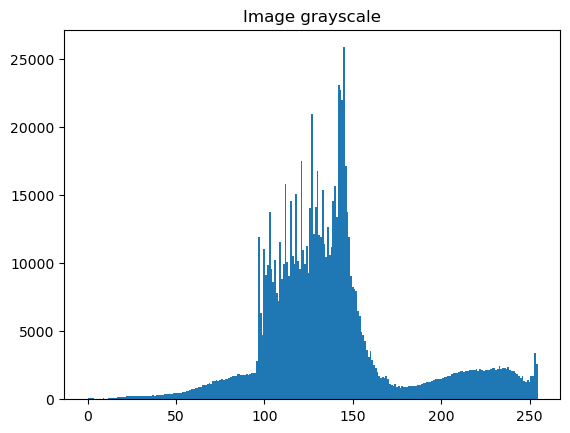

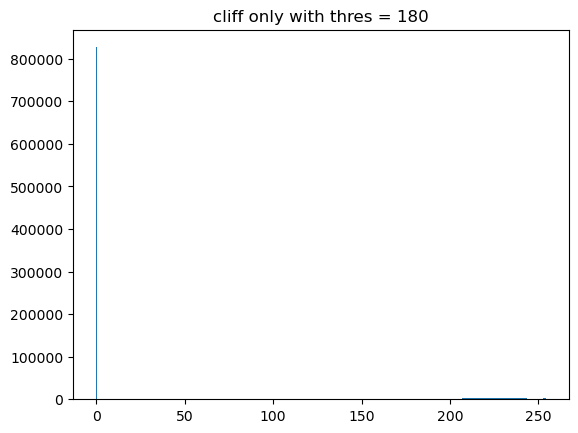

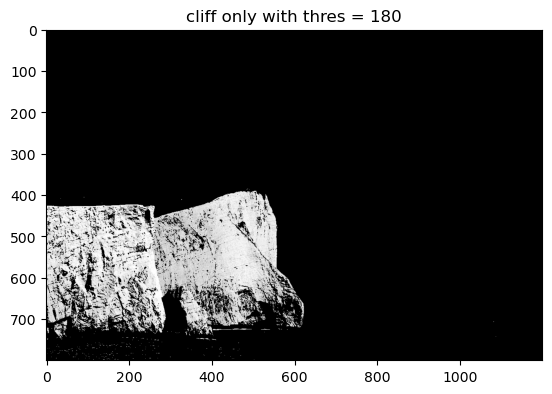

In [7]:
# Tut 7.6.4 b

plot_hist_from_img(imgBw, title = 'Image grayscale')

# Set any value <180 to 0 and keep any value >180
cliffonly = imgBw.copy()
cliffonly[cliffonly < 180] = 0

plot_hist_from_img(cliffonly, title = 'cliff only with thres = 180')

plt.imshow(cliffonly, cmap=plt.cm.gray)
plt.title('cliff only with thres = 180')
plt.show()

There are only 4 level of gray: {180.0, 205.0, 230.0, 255.0}


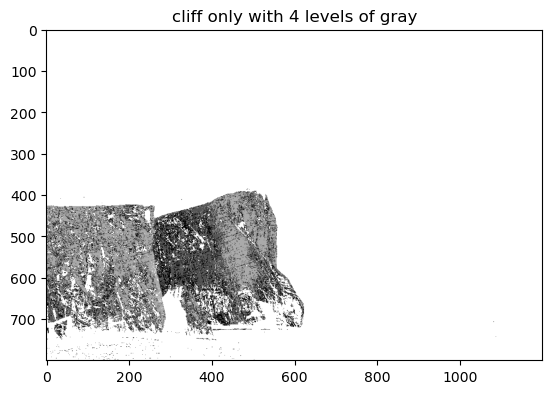

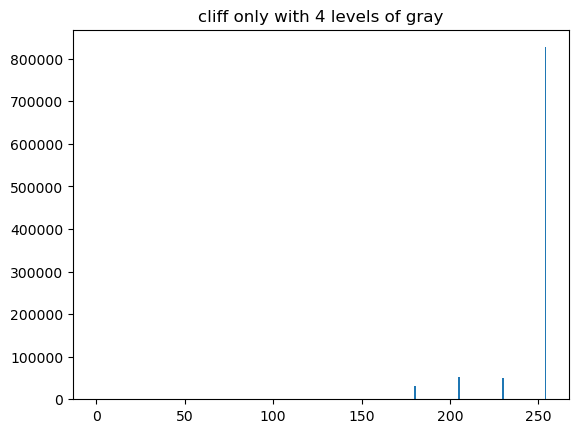

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [8]:
# Tut 7.6.4 c

# Reduce to only 4 level of grayness

res = (255 - 180)/3
cliffonly_4_gray = np.floor((cliffonly.flatten() - 180)/res) * res + 180
print(f'There are only 4 level of gray: {set(cliffonly_4_gray)}')

cliffonly_4_gray = cliffonly_4_gray.reshape(imgBw.shape)

plt.imshow(cliffonly_4_gray, cmap=plt.cm.gray)
plt.title('cliff only with 4 levels of gray')
plt.show()

plot_hist_from_img(cliffonly_4_gray, title = 'cliff only with 4 levels of gray')

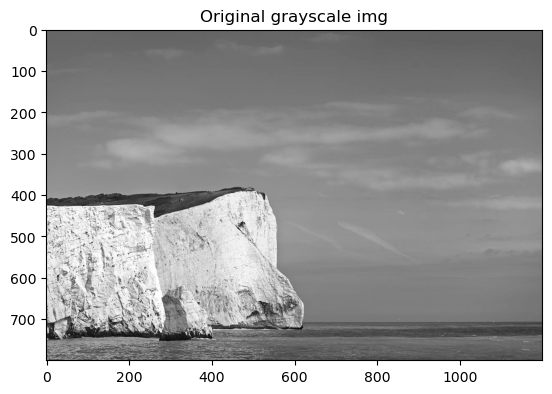

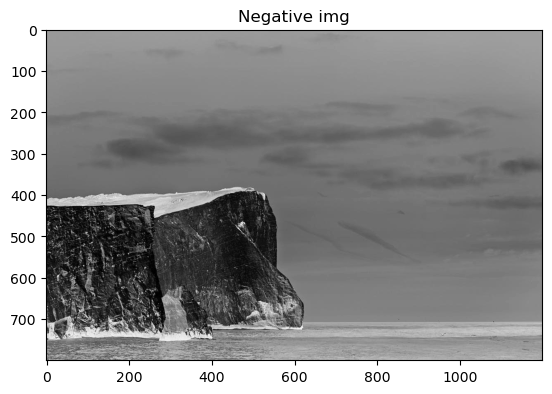

In [9]:
# Tut 7.6.4 d
plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title('Original grayscale img')
plt.show()

img_neg = 255 - imgBw
plt.imshow(img_neg, cmap=plt.cm.gray)
plt.title('Negative img')
plt.show()

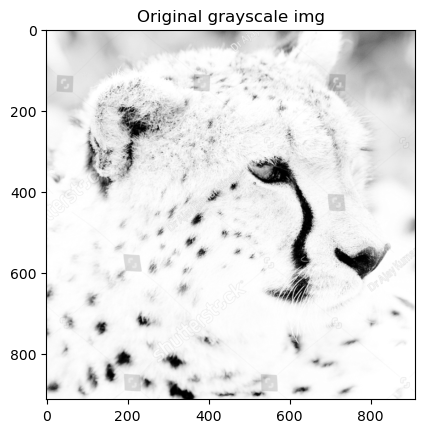

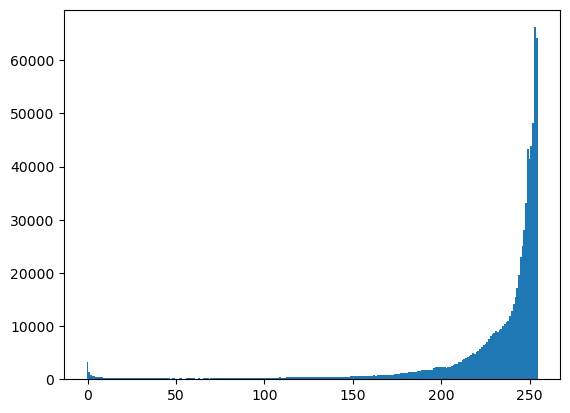

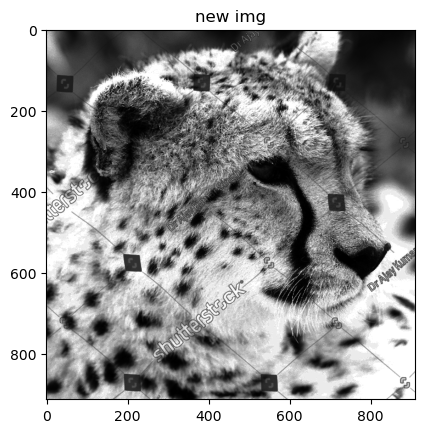

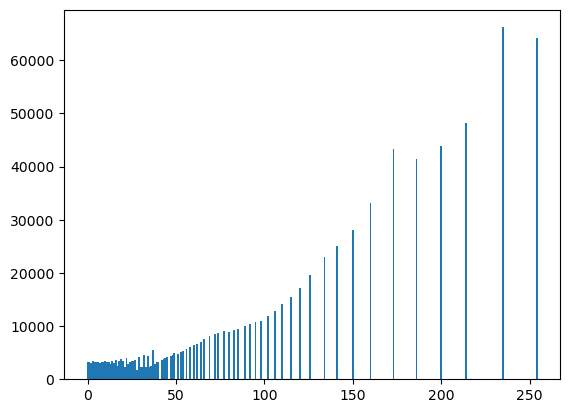

In [13]:
# 7.6.5

img = cv2.imread('Computer_vision_files/Tiger.jpeg')
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title('Original grayscale img')
plt.show()

hist = plot_hist_from_img(imgBw)

# Redistribute the level of gray uniformly across the range [0:255]

# Calculate the cumulative distribution of the pixel values
cumulative_dist = np.cumsum(hist)

# Normalize the cumulative distribution to make it linear
linear_dist = cumulative_dist / cumulative_dist.max() * 255  # 0 to 255

bins = [i for i in range(0, 256)]

# Map the pixel values of the input image to the new linear distribution
new_img = np.interp(imgBw.flatten(), bins[:-1], linear_dist)

new_img = new_img.reshape(imgBw.shape).astype(np.uint8)

plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('new img')
plt.show()

hist = plot_hist_from_img(new_img)

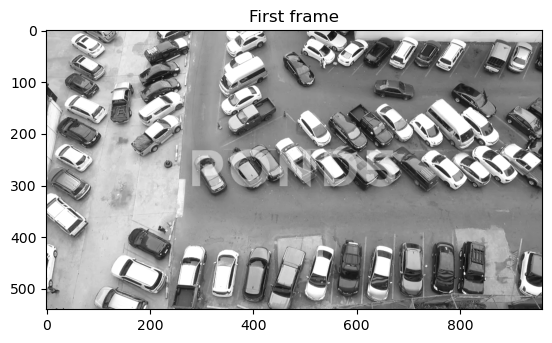

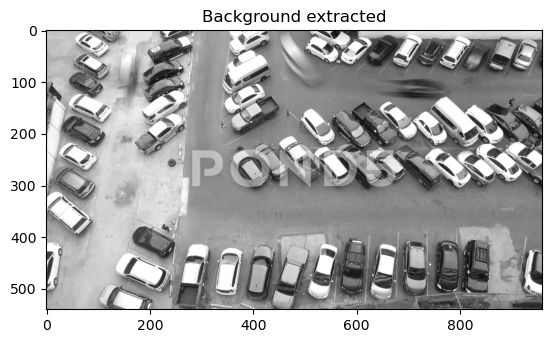

Number of frames: 573


In [21]:
# 7.6.6 a

# Load the video
cap = cv2.VideoCapture('Computer_vision_files/CarsMoving.mp4')

# Capture the first frame as the background
ret, frame = cap.read()
background = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Display the grayscale frame using Matplotlib
plt.imshow(background, cmap='gray')
plt.title('First frame')
plt.show()

# set the threshold
sigma = 1 

count = 0
# Loop through the video frames
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    
    # If the frame was not read successfully, break the loop
    if not ret:
        break
    
    # Convert the frame to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff = frame - background # I - B
    
    # Use np.minimum and maximum instead of np.min and np.max
    F = np.maximum(np.minimum(diff, sigma), -sigma)
    background = background + F
    count += 1
    
    # Display the grayscale frame using Matplotlib
    # plt.imshow(gray, cmap='gray')
    # plt.show()
    
    # Pause for a short time to allow the user to see the frame
    # plt.pause(0.01)


# Display the grayscale frame using Matplotlib
plt.imshow(background, cmap='gray')
plt.title('Background extracted')
plt.show()
print(f'Number of frames: {count}')

In [18]:
# Tut 7.6.6 b (Continued from a)

cap = cv2.VideoCapture('Computer_vision_files/CarsMoving.mp4')

# Set the output video file name and resolution
filename = 'Computer_vision_files/CarMotion.mp4'
frame_height, frame_width = background.shape

# Create a VideoWriter object to write the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Specify the codec

# Assume the frame rate is 10 fps
out = cv2.VideoWriter(filename, fourcc, 10, (frame_width, frame_height))

# Loop through the input frames
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    
    # If the frame was not read successfully, break the loop
    if not ret:
        break
    
    # Convert the frame to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    motion = frame - background # (background is extracted in qn a)
    
    # Write the frame to the output video file
    out.write(motion)

# Release the output video file and clean up
out.release()

In [19]:
a = np.array([1,2,3,4])
np.minimum(a, 2)

array([1, 2, 2, 2])

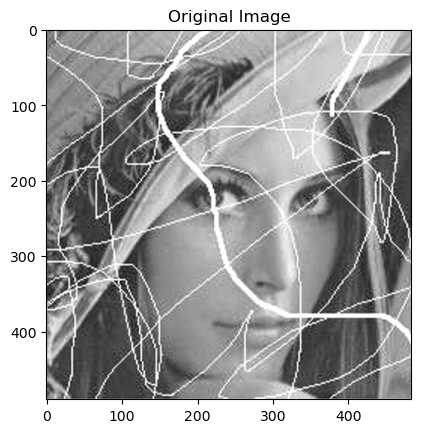

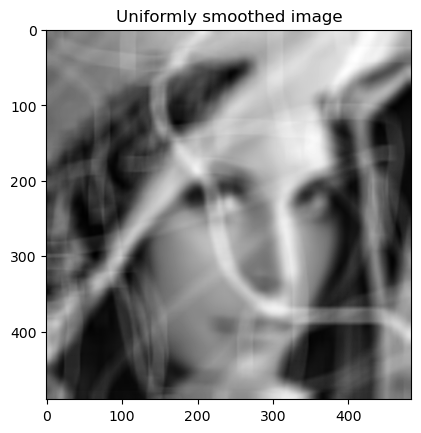

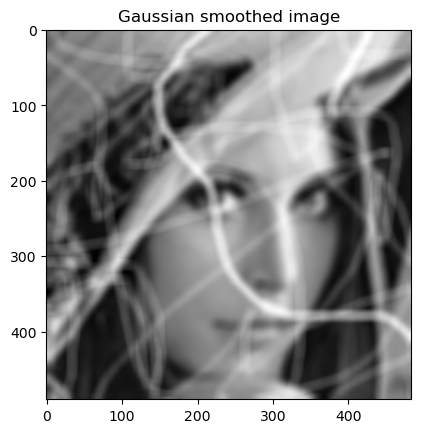

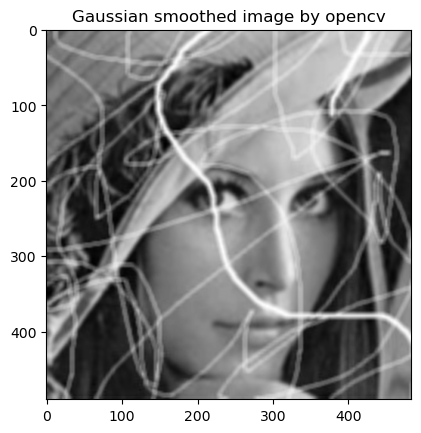

(7, 7)

In [34]:
# 7.6.7 a

img = cv2.imread('Computer_vision_files/LadyFace.jpeg')
# Divide 255 to convert image from range 0-255 to 0-1
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title('Original Image')
plt.show()

# Uniform kernal of size 21
kernel = np.ones([21,21])/21**2

uniform_smoothed = cv2.filter2D(imgBw, -1, kernel)
plt.imshow(uniform_smoothed, cmap=plt.cm.gray)
plt.title('Uniformly smoothed image')
plt.show()

# 7.6.7 b (Follow sample answer in matlab)

sigma = 7 # standard deviation of the Gaussian  bell shape
w = 7 # size of the filtering window
x = np.arange(-w, w+1, 1)
y = np.arange(-w, w+1, 1)
X, Y = np.meshgrid(x, y)
K = 1/(2*np.pi*sigma**2)*np.exp(-(X**2 + Y**2)/(2*sigma**2))
gauss_smoothed = cv2.filter2D(imgBw, -1, K)
plt.imshow(gauss_smoothed, cmap=plt.cm.gray)
plt.title('Gaussian smoothed image')
plt.show()


# Define the Gaussian kernel
ksize = 7
sigma = 7
kernel = cv2.getGaussianKernel(ksize, sigma)
gaussian_kernel = np.outer(kernel, kernel.transpose())

# Apply the filter to the image
smoothed_img = cv2.filter2D(imgBw, -1, gaussian_kernel)

plt.imshow(smoothed_img, cmap=plt.cm.gray)
plt.title('Gaussian smoothed image by opencv')
plt.show()

gaussian_kernel.shape


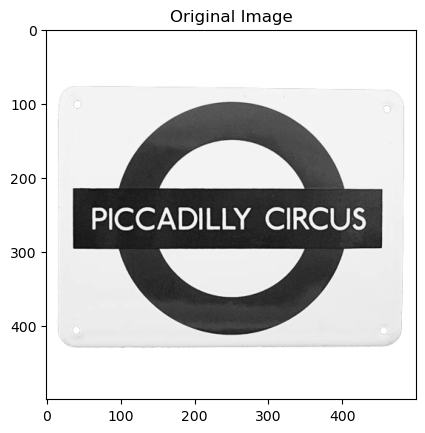

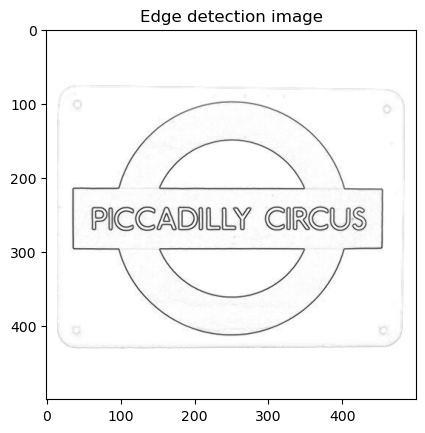

In [23]:
# 7.6.8

img = cv2.imread('Computer_vision_files/StreetSign.jpeg')
# Divide 255 to convert image from range 0-255 to 0-1
# If do not divide 255, the result will be very different
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title('Original Image')
plt.show()

K = np.array([0.5, 0, -0.5]).reshape(-1, 1)
edge_hor = cv2.filter2D(imgBw, -1, K)
edge_ver = cv2.filter2D(imgBw, -1, K.T)

edge = 1 - np.sqrt(edge_hor**2 + edge_ver**2)
plt.imshow(edge, cmap=plt.cm.gray)
plt.title('Edge detection image')
plt.show()


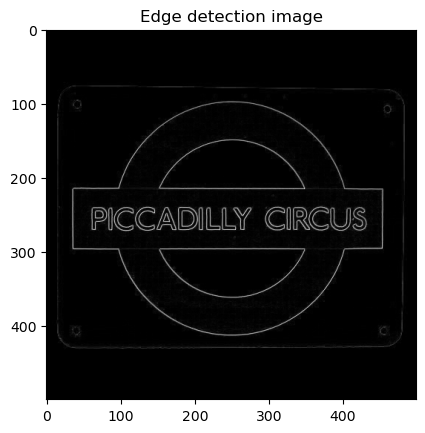

In [24]:
# Another method (taught in ML class)
npy, npx = imgBw.shape
diffx = np.diff(imgBw, axis=1) 
diffy = np.diff(imgBw, axis=0)

diffx = diffx[0:npy - 1,:]
diffy = diffy[:,0:npx - 1]

edgeIm = np.sqrt(np.power(diffx,2)+np.power(diffy,2))

plt.imshow(edgeIm, cmap=plt.cm.gray)
plt.title('Edge detection image')
plt.show()

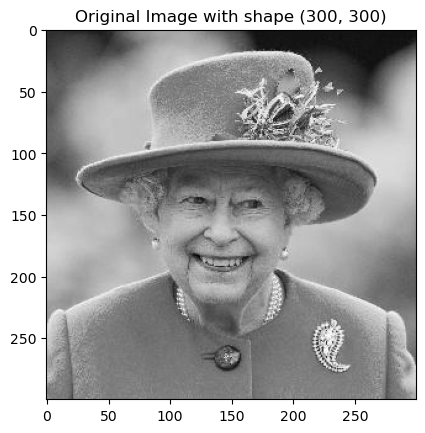

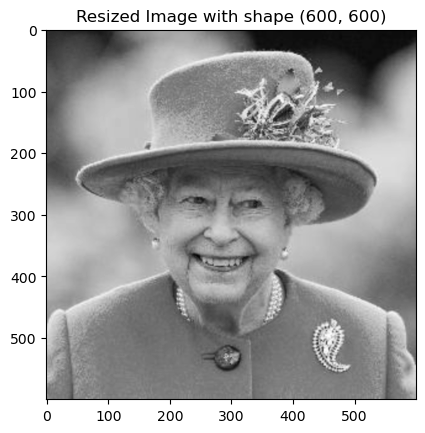

In [25]:
# 7.6.9 (Easy to compute in openCV)
img = cv2.imread('Computer_vision_files/QueenSmall.jpg')
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title(f'Original Image with shape {imgBw.shape}')
plt.show()

resized = cv2.resize(imgBw, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
plt.imshow(resized, cmap=plt.cm.gray)
plt.title(f'Resized Image with shape {resized.shape}')
plt.show()

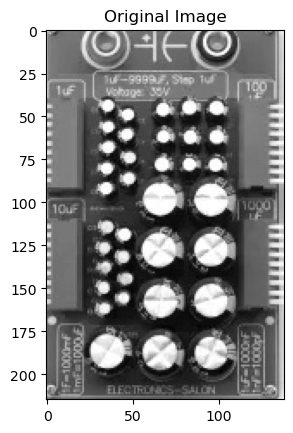

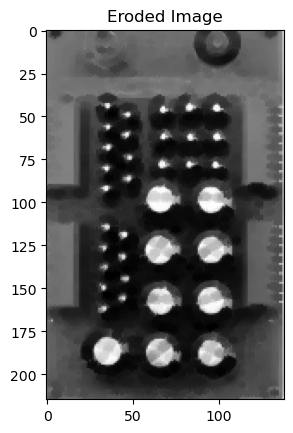

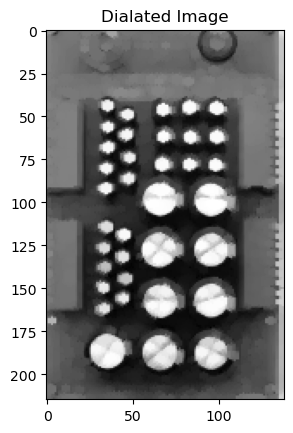

In [26]:
# 7.6.10

# Read input image
img = cv2.imread('Computer_vision_files/Circuit.jpeg')
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title(f'Original Image')
plt.show()

# We need to apply erosion and dialation in this question
# since we only want to extract the capacitor with larger size.
# If we simply apply dialation, other shape will also be dialated, not just the capacitor

# Define circular structuring element with radius 5
radius = 5
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (radius, radius))

# Perform erosion and dilation operations
eroded = cv2.erode(imgBw, kernel)
plt.imshow(eroded, cmap=plt.cm.gray)
plt.title(f'Eroded Image')
plt.show()

dilated = cv2.dilate(eroded, kernel)
plt.imshow(dilated, cmap=plt.cm.gray)
plt.title(f'Dialated Image')
plt.show()

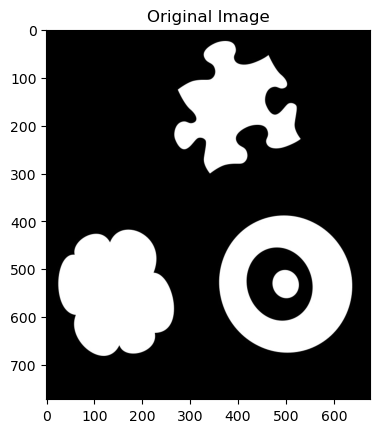

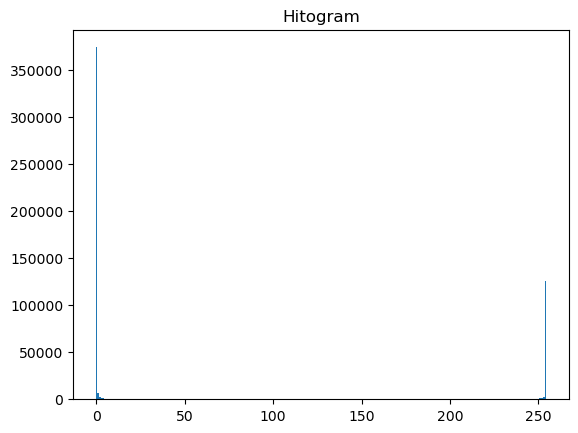

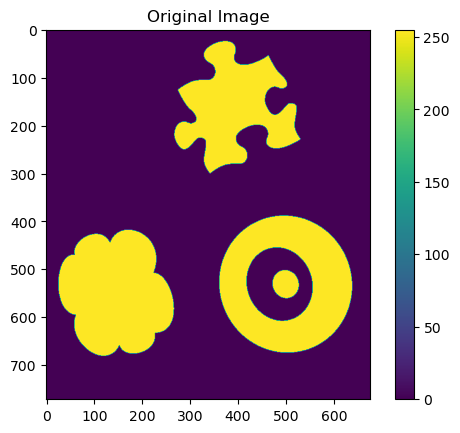

In [27]:
# 7.6.11 a

# Read input image
img = cv2.imread('Computer_vision_files/Shapes.jpeg')
imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgBw, cmap=plt.cm.gray)
plt.title(f'Original Image')
plt.show()

hist = plot_hist_from_img(imgBw, title = 'Hitogram')

# The threshold of 150 is observed from the histogram
classify = imgBw.copy()
classify[classify < 150] = 0
classify[classify > 150] = 255

plt.imshow(classify)
plt.colorbar()
plt.title(f'Original Image')
plt.show()

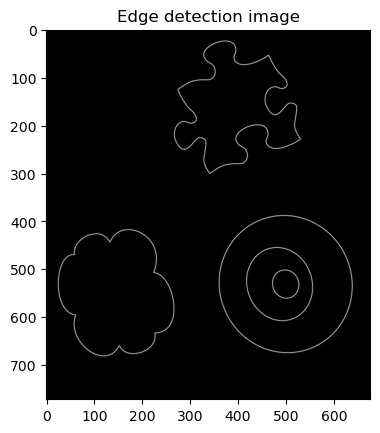

In [28]:
# 7.6.11 b (Using edge detection method, similar to 7.6.8)

imgBw2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
K = np.array([0.5, 0, -0.5]).reshape(-1, 1)
edge_hor = cv2.filter2D(imgBw2, -1, K)
edge_ver = cv2.filter2D(imgBw2, -1, K.T)

edge = np.sqrt(edge_hor**2 + edge_ver**2)
plt.imshow(edge, cmap=plt.cm.gray)
plt.title('Edge detection image')
plt.show()

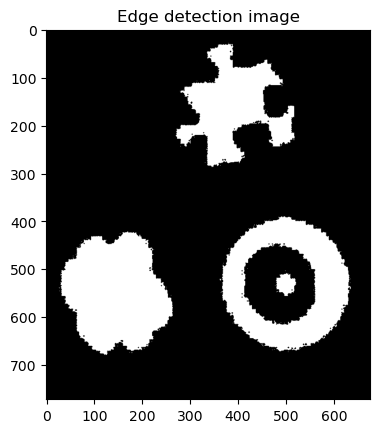

In [29]:
# 7.6.11 b (follow the sample answer but does not work well)
nr, nc = imgBw.shape # Number of rows and columns

new_img = np.zeros([nr, nc])

for r in range(nr):
    for c in range(nc):
        # check if this pixel is part of a shape and not an interior point
        if imgBw[r, c] == 255 and (imgBw[r-1,c]==255 
                                   & imgBw[r+1,c]==255 
                                   & imgBw[r,c-1]==255 
                                   & imgBw[r,c+1]==255):
            
            # it is not an interior pixel, hence flag it as perimetral pixel
            new_img[r, c] = 255
        
plt.imshow(new_img, cmap=plt.cm.gray)
plt.title('Edge detection image')
plt.show()

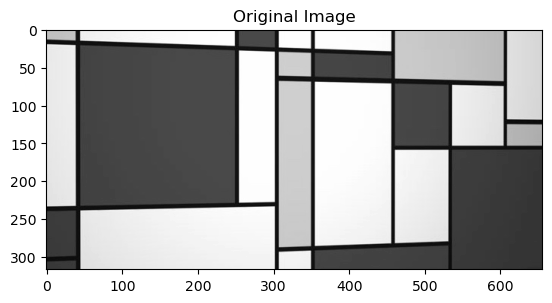

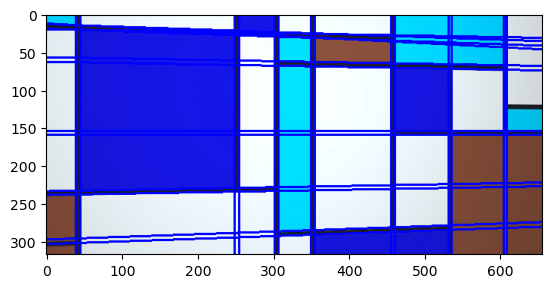

In [30]:
# Read input image
img = cv2.imread('Computer_vision_files/Mondrian.jpeg')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap=plt.cm.gray)
plt.title(f'Original Image')
plt.show()

# Apply edge detection to find edges in the image
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough transform to detect lines in the image
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=100)

# Draw the detected lines on the original image
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Display the original image with the detected lines
plt.imshow(img, cmap=plt.cm.gray)

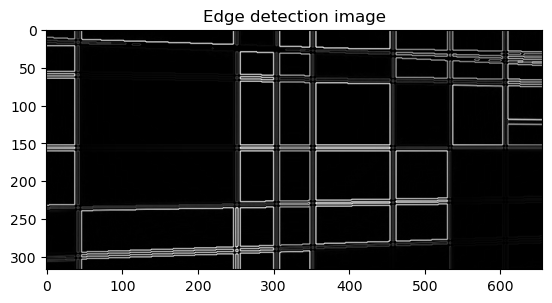

In [31]:
# 7.6.13 (Using edge detection method, similar to 7.6.8)

imgBw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255
K = np.array([0.5, 0, -0.5]).reshape(-1, 1)
edge_hor = cv2.filter2D(imgBw, -1, K)
edge_ver = cv2.filter2D(imgBw, -1, K.T)

edge = np.sqrt(edge_hor**2 + edge_ver**2)
plt.imshow(edge, cmap=plt.cm.gray)
plt.title('Edge detection image')
plt.show()